In [95]:
#importing packages 
import sqlite3    #importing sqlite package for data handling from database
import pandas as pd  #importing pandas for data preprocessing
from sklearn.linear_model import LinearRegression  #importing package to create linear model
from sklearn.model_selection import train_test_split  #importing package to generate test and train dataset
from sklearn.metrics import mean_squared_error  #to calculate mean_square_error of predicted values from actual value in model
from math import sqrt #importing sqrt for mathematical operation
from sklearn import metrics  #importing package to to calculate accuracy prediction from r2_score

In [96]:
#Creating connection.
cnx = sqlite3.connect('database.sqlite')

#selecting all data of 'Player_Attribute' table in 'df' dataframe
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

#showing top 5 results
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [97]:
#droping features that are not neccessary for rating prediction
df.drop(['id','player_fifa_api_id','player_api_id','date'],axis=1,inplace=True)

In [98]:
#showing top 5 records
df.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [100]:
import numpy as np   #importing numpy package for array operations
import matplotlib.pyplot as plt   #importing matplotlib package for data visualization
import seaborn as sns   #package for data visualization
%matplotlib inline  

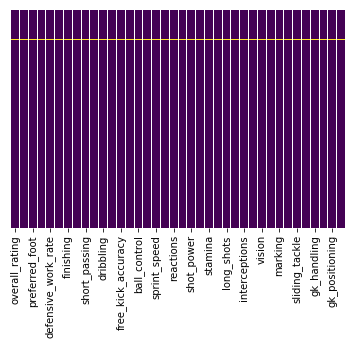

In [101]:
#visualizing null values from dataframe
sns.heatmap(df.isnull(),xticklabels='auto',yticklabels=False,cbar=False,cmap='viridis')

C:\Users\Vibhor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


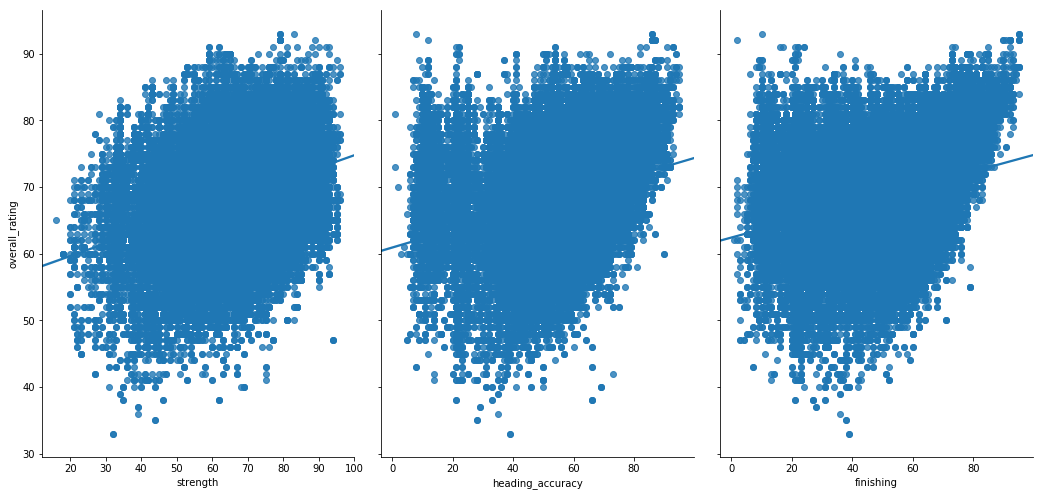

In [103]:
#drawing pairplot of dependent feature with some of it's independent features for top 100000 records
sns.pairplot(df.head(100000), x_vars=['strength','heading_accuracy','finishing'], y_vars='overall_rating', height=7, aspect=0.7, kind='reg')

In [104]:
#showing all columns of the dataframe
df.columns

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [105]:
#labeling different label's of 'attacking_work_rate' column in 3 labels
df['attacking_work_rate']=df.attacking_work_rate.map({
    'low':'low','medium':'medium','high':'high',None:None,'norm':None,'stoc':None, 'None':None,'le':None,'y':None
})

#describing the 'attacking_work_rate' column
pd.Categorical(df['attacking_work_rate']).describe()

,counts,freqs
categories,,
high,42823,0.232762
low,8569,0.046576
medium,125070,0.679810
NaN,7516,0.040853


In [106]:
#labeling different label's of 'defensive_work_rate' column in 3 labels
df['defensive_work_rate']=df.defensive_work_rate.map({
    '6':None, '9':None, 'high':'high', '_0':None, 'tocky':None, '8':None, 'o':None, None:None, 'ormal':None, 'medium':'medium','4':None, '3':None, '2':None, 'es':None, '0':None, '7':None, '1':None, 'low':'low', 'ean':None, '5':None
})

#describing the 'defensive_work_rate' column
pd.Categorical(df['defensive_work_rate']).describe()

,counts,freqs
categories,,
high,27041,0.146980
low,18432,0.100186
medium,130846,0.711205
NaN,7659,0.041630


In [107]:
#droping records with nan values
df.dropna(inplace=True)

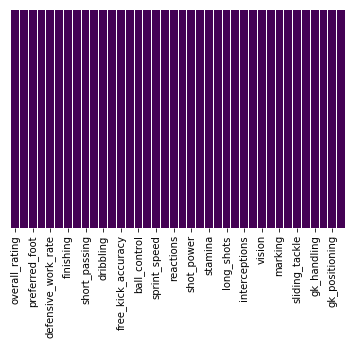

In [108]:
#visualizing dataframe 
sns.heatmap(df.isnull(),xticklabels='auto',yticklabels=False,cbar=False,cmap='viridis')

In [109]:
#checking if is there any null values in the dataframe
df.isnull().sum()

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

In [110]:
#performing label-encoding on preferred_foot column
preferred_foot_df=pd.get_dummies(df.preferred_foot,prefix='pre_ft') 

#performing label-encoding on attacking_work_rate column
attacking_work_rate = pd.get_dummies(df.attacking_work_rate,prefix='attack_wr')

#performing label-encoding on defensive_work_rate column
defensive_work_rate = pd.get_dummies(df.defensive_work_rate,prefix='defense_wr')

In [111]:
#checking df shape after removing null values
df.shape

(176161, 38)

In [112]:
#showing top 5 records
df.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [113]:
#concatinating all the labled dataframes with actual dataframe
df = pd.concat([df,preferred_foot_df,attacking_work_rate,defensive_work_rate],axis=1)

#droping columns on whom label encoding has been performed
df.drop(['preferred_foot','defensive_work_rate','attacking_work_rate'],inplace=True,axis=1)

#showing top 5 records
df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_positioning,gk_reflexes,pre_ft_left,pre_ft_right,attack_wr_high,attack_wr_low,attack_wr_medium,defense_wr_high,defense_wr_low,defense_wr_medium
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,7.0,7.0,0,1,0,0,1,0,0,1
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,7.0,7.0,0,1,0,0,1,0,0,1


In [114]:
#getting all the independent features in 'X' dataframe
X = df[df.columns.difference(['overall_rating'])]

#getting dependent feature 'overall_rating' in y array
y = df.iloc[:, 1].values

In [115]:
#showing top 5 independent features dataframe
X.head()

,acceleration,aggression,agility,attack_wr_high,attack_wr_low,attack_wr_medium,balance,ball_control,crossing,curve,...,reactions,short_passing,shot_power,sliding_tackle,sprint_speed,stamina,standing_tackle,strength,vision,volleys
0,60.0,71.0,59.0,0,0,1,65.0,49.0,49.0,45.0,...,47.0,61.0,55.0,69.0,64.0,54.0,69.0,76.0,54.0,44.0
1,60.0,71.0,59.0,0,0,1,65.0,49.0,49.0,45.0,...,47.0,61.0,55.0,69.0,64.0,54.0,69.0,76.0,54.0,44.0
2,60.0,63.0,59.0,0,0,1,65.0,49.0,49.0,45.0,...,47.0,61.0,55.0,69.0,64.0,54.0,66.0,76.0,54.0,44.0
3,60.0,62.0,59.0,0,0,1,65.0,48.0,48.0,44.0,...,46.0,60.0,54.0,66.0,64.0,54.0,63.0,76.0,53.0,43.0
4,60.0,62.0,59.0,0,0,1,65.0,48.0,48.0,44.0,...,46.0,60.0,54.0,66.0,64.0,54.0,63.0,76.0,53.0,43.0


In [116]:
#importing package for spliting data into training and test set
from sklearn.model_selection import train_test_split

In [117]:
#getting training and test set data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [118]:
#initializing model instance for fiting data into the model
regressor = LinearRegression()

#fitting data into linear regression model
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


#printing the mean_absolute_error in result
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,y_pred)) # mean absolute error

#printing the mean_squared_error in result
print('mean_squared_error: ',metrics.mean_squared_error(y_test,y_pred)) #  mean squared error

#package to calculate accuracy of the model
from sklearn.metrics import r2_score

#calculating the accuracy of model using r2_score 
score=r2_score(y_test,y_pred)

print(score*100,'%')

mean_absolute_error:  3.0224636248357433e-14
mean_squared_error:  1.402705340026302e-27
100.0 %


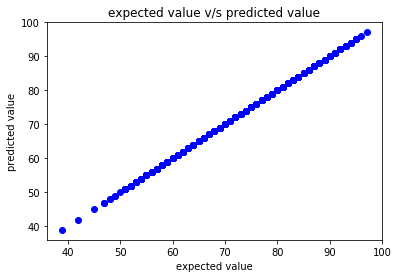

In [119]:
#plotting the expected value v/s predicted value
plt.scatter(y_test,y_pred,color='blue')
plt.title('expected value v/s predicted value')   #setting title to the plot
plt.xlabel('expected value')    #labeling x-axis
plt.ylabel('predicted value')   #labeling y-axis
plt.show()   #showing the plot